In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import kagglehub


In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!kaggle datasets download -d hayder17/breast-cancer-detection -p /content/dataset --unzip



Dataset URL: https://www.kaggle.com/datasets/hayder17/breast-cancer-detection


 39%|███▉      | 34.0M/87.2M [00:00<?, ?B/s]
 40%|████      | 35.0M/87.2M [00:01<01:29, 613kB/s]
 41%|████▏     | 36.0M/87.2M [00:02<00:54, 995kB/s]
 42%|████▏     | 37.0M/87.2M [00:02<00:42, 1.24MB/s]
 44%|████▎     | 38.0M/87.2M [00:03<00:43, 1.19MB/s]
 45%|████▍     | 39.0M/87.2M [00:04<00:36, 1.38MB/s]
 46%|████▌     | 40.0M/87.2M [00:05<00:37, 1.32MB/s]
 47%|████▋     | 41.0M/87.2M [00:06<00:36, 1.33MB/s]
 48%|████▊     | 42.0M/87.2M [00:07<00:40, 1.18MB/s]
 49%|████▉     | 43.0M/87.2M [00:07<00:33, 1.38MB/s]
 50%|█████     | 44.0M/87.2M [00:08<00:32, 1.41MB/s]
 52%|█████▏    | 45.0M/87.2M [00:08<00:29, 1.49MB/s]
 53%|█████▎    | 46.0M/87.2M [00:09<00:30, 1.43MB/s]
 54%|█████▍    | 47.0M/87.2M [00:09<00:23, 1.77MB/s]
 55%|█████▌    | 48.0M/87.2M [00:10<00:20, 2.04MB/s]
 56%|█████▌    | 49.0M/87.2M [00:10<00:18, 2.15MB/s]
 57%|█████▋    | 50.0M/87.2M [00:11<00:16, 2.30MB/s]
 58%|█████▊    | 51.0M/87.2M [00:11<00:16, 2.28MB/s]
 60%|█████▉    | 52.0M/87.2M [00:12<00:17, 2.10MB/s]
 6


License(s): DbCL-1.0
... resuming from 35651584 bytes (55827950 bytes left) ...



In [3]:
test_dir = '/content/dataset/test'
train_dir = '/content/dataset/train'
valid_dir = '/content/dataset/valid'

import tensorflow as tf
from pathlib import Path

In [4]:
# Define image dimensions
IMG_WIDTH, IMG_HEIGHT = 150, 150

def load_images_labels(directory, img_width, img_height):
    data_dir = Path(directory)
    classes = sorted([d.name for d in data_dir.iterdir() if d.is_dir()])
    all_images, all_labels = [], []

    for label, class_name in enumerate(classes):
        class_dir = data_dir / class_name
        for img_path in class_dir.glob("*.jpg"):
            img = tf.image.decode_jpeg(tf.io.read_file(str(img_path)), channels=3)
            img = tf.image.resize(img, [img_width, img_height]) / 255.0
            all_images.append(img)
            all_labels.append(label)

    images = tf.stack(all_images)
    labels = tf.one_hot(all_labels, depth=len(classes))
    return images, labels

In [5]:
# Load datasets
train_images, train_labels = load_images_labels(train_dir, IMG_WIDTH, IMG_HEIGHT)
valid_images, valid_labels = load_images_labels(valid_dir, IMG_WIDTH, IMG_HEIGHT)
test_images, test_labels = load_images_labels(test_dir, IMG_WIDTH, IMG_HEIGHT)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(16).shuffle(1000)
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels)).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(16)

from tensorflow.keras.applications import InceptionV3, DenseNet121, ResNet50, VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def create_model(base_model, input_shape, num_classes):
    base = base_model(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(528, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)
num_classes = 2

models = {
    "inceptionv3": create_model(InceptionV3, input_shape, num_classes),
    "densenet": create_model(DenseNet121, input_shape, num_classes),
    "resnet": create_model(ResNet50, input_shape, num_classes),
    "vgg19": create_model(VGG19, input_shape, num_classes),
}

Training inceptionv3...
Epoch 1/12
149/149 [==============================] - 30s 136ms/step - loss: 0.7587 - accuracy: 0.5856 - val_loss: 0.6532 - val_accuracy: 0.6652
Epoch 2/12
149/149 [==============================] - 19s 124ms/step - loss: 0.6739 - accuracy: 0.6463 - val_loss: 0.6456 - val_accuracy: 0.6637
Epoch 3/12
149/149 [==============================] - 19s 124ms/step - loss: 0.6680 - accuracy: 0.6459 - val_loss: 0.6521 - val_accuracy: 0.6607
Epoch 4/12
149/149 [==============================] - 19s 124ms/step - loss: 0.6363 - accuracy: 0.6530 - val_loss: 0.6582 - val_accuracy: 0.6593
Epoch 5/12
149/149 [==============================] - 19s 124ms/step - loss: 0.6415 - accuracy: 0.6518 - val_loss: 0.6491 - val_accuracy: 0.6563
Epoch 6/12
149/149 [==============================] - 19s 124ms/step - loss: 0.5799 - accuracy: 0.6855 - val_loss: 0.6667 - val_accuracy: 0.6637
Epoch 7/12
149/149 [==============================] - 19s 124ms/step - loss: 0.5531 - accuracy: 0.7011 - v

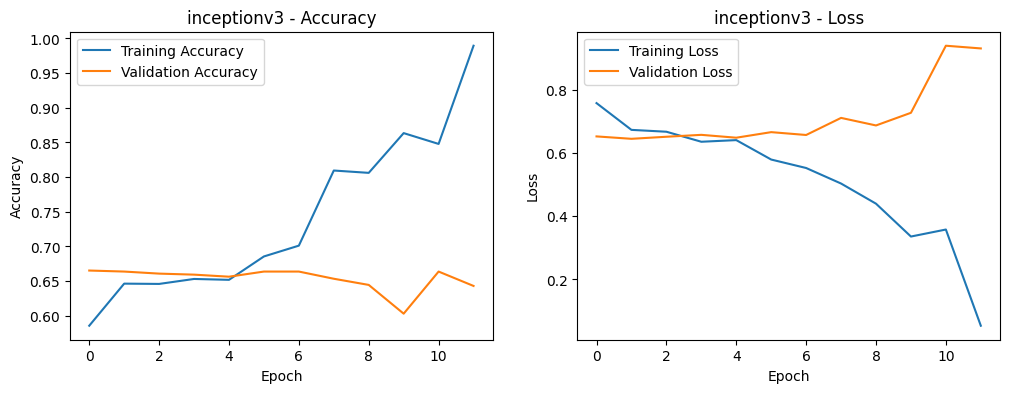

Training densenet...
Epoch 1/12
149/149 [==============================] - 34s 166ms/step - loss: 0.8596 - accuracy: 0.5632 - val_loss: 0.8464 - val_accuracy: 0.6637
Epoch 2/12
149/149 [==============================] - 24s 158ms/step - loss: 0.7147 - accuracy: 0.6151 - val_loss: 0.7394 - val_accuracy: 0.6637
Epoch 3/12
149/149 [==============================] - 24s 159ms/step - loss: 0.7065 - accuracy: 0.6277 - val_loss: 0.6578 - val_accuracy: 0.6430
Epoch 4/12
149/149 [==============================] - 24s 159ms/step - loss: 0.6397 - accuracy: 0.6505 - val_loss: 0.6972 - val_accuracy: 0.5185
Epoch 5/12
149/149 [==============================] - 24s 158ms/step - loss: 0.6344 - accuracy: 0.6429 - val_loss: 0.7108 - val_accuracy: 0.6622
Epoch 6/12
149/149 [==============================] - 24s 161ms/step - loss: 0.6211 - accuracy: 0.6606 - val_loss: 0.6989 - val_accuracy: 0.6015
Epoch 7/12
149/149 [==============================] - 24s 160ms/step - loss: 0.6024 - accuracy: 0.6665 - val_

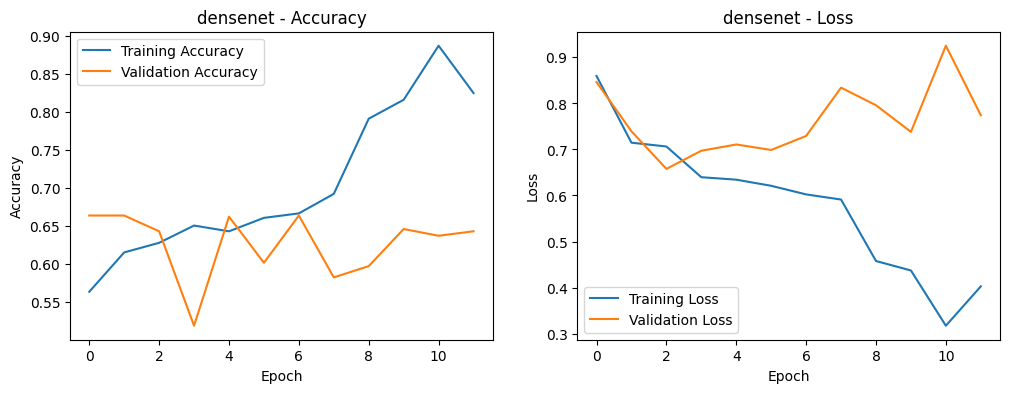

Training resnet...
Epoch 1/12
149/149 [==============================] - 26s 133ms/step - loss: 0.8062 - accuracy: 0.6142 - val_loss: 0.7287 - val_accuracy: 0.6637
Epoch 2/12
149/149 [==============================] - 19s 129ms/step - loss: 0.6684 - accuracy: 0.6345 - val_loss: 0.6441 - val_accuracy: 0.6637
Epoch 3/12
149/149 [==============================] - 19s 127ms/step - loss: 0.6411 - accuracy: 0.6408 - val_loss: 0.6408 - val_accuracy: 0.6637
Epoch 4/12
149/149 [==============================] - 19s 127ms/step - loss: 0.6188 - accuracy: 0.6573 - val_loss: 0.6404 - val_accuracy: 0.6637
Epoch 5/12
149/149 [==============================] - 19s 126ms/step - loss: 0.5921 - accuracy: 0.6775 - val_loss: 0.6379 - val_accuracy: 0.6637
Epoch 6/12
149/149 [==============================] - 19s 125ms/step - loss: 0.5485 - accuracy: 0.7361 - val_loss: 0.6298 - val_accuracy: 0.6622
Epoch 7/12
149/149 [==============================] - 19s 128ms/step - loss: 0.5865 - accuracy: 0.6754 - val_lo

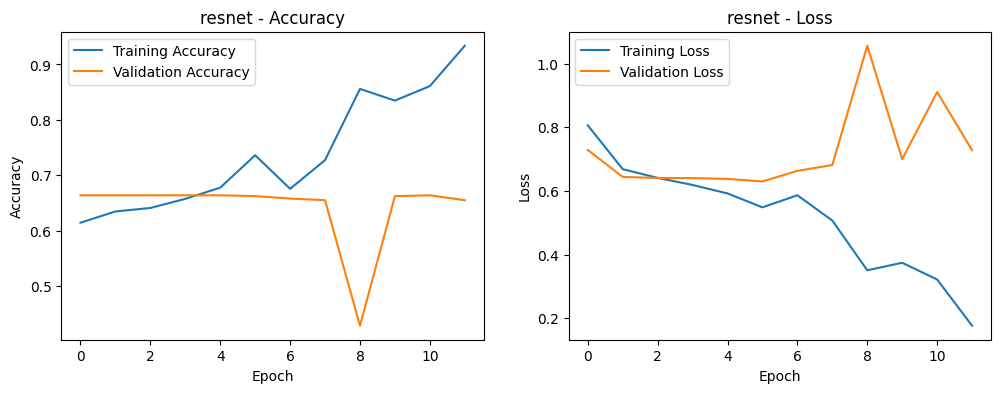

Training vgg19...
Epoch 1/12
149/149 [==============================] - 29s 148ms/step - loss: 0.7725 - accuracy: 0.6003 - val_loss: 0.6594 - val_accuracy: 0.6637
Epoch 2/12
149/149 [==============================] - 21s 136ms/step - loss: 0.7005 - accuracy: 0.6067 - val_loss: 0.6385 - val_accuracy: 0.6637
Epoch 3/12
149/149 [==============================] - 20s 135ms/step - loss: 0.9592 - accuracy: 0.5780 - val_loss: 0.6836 - val_accuracy: 0.6637
Epoch 4/12
149/149 [==============================] - 20s 135ms/step - loss: 0.6744 - accuracy: 0.6615 - val_loss: 0.6634 - val_accuracy: 0.6637
Epoch 5/12
149/149 [==============================] - 20s 136ms/step - loss: 0.6593 - accuracy: 0.6615 - val_loss: 0.6521 - val_accuracy: 0.6637
Epoch 6/12
149/149 [==============================] - 20s 135ms/step - loss: 0.6501 - accuracy: 0.6615 - val_loss: 0.6452 - val_accuracy: 0.6637
Epoch 7/12
149/149 [==============================] - 20s 134ms/step - loss: 0.6463 - accuracy: 0.6615 - val_los

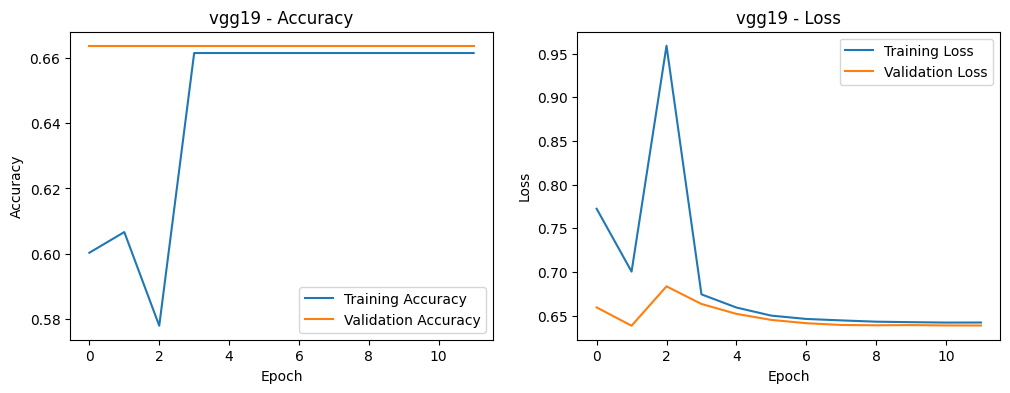

In [6]:
# Train each model for 1 epoch and plot results
epochs = 12
for model_name, model in models.items():
    print(f"Training {model_name}...")
    history = model.fit(train_dataset, epochs=epochs, validation_data=valid_dataset)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{model_name} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{model_name} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


In [7]:
 models[model_name] = model

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = np.argmax(model.predict(test_images), axis=1)
    y_true = np.argmax(test_labels, axis=1)
    loss, accuracy = model.evaluate(test_dataset, verbose=0)
    print(f"{model_name} - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=sorted(os.listdir(train_dir))))


Evaluating inceptionv3...
11/11 [==============================] - 2s 52ms/step
inceptionv3 - Test Loss: 0.9553, Test Accuracy: 0.6161
              precision    recall  f1-score   support

           0       0.62      0.96      0.76       208
           1       0.47      0.05      0.10       128

    accuracy                           0.62       336
   macro avg       0.54      0.51      0.43       336
weighted avg       0.56      0.62      0.51       336

Evaluating densenet...
11/11 [==============================] - 2s 69ms/step
densenet - Test Loss: 0.7505, Test Accuracy: 0.6012
              precision    recall  f1-score   support

           0       0.62      0.92      0.74       208
           1       0.38      0.08      0.13       128

    accuracy                           0.60       336
   macro avg       0.50      0.50      0.44       336
weighted avg       0.53      0.60      0.51       336

Evaluating resnet...
11/11 [==============================] - 1s 47ms/step
resnet 

C:\Users\donph\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\donph\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\donph\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


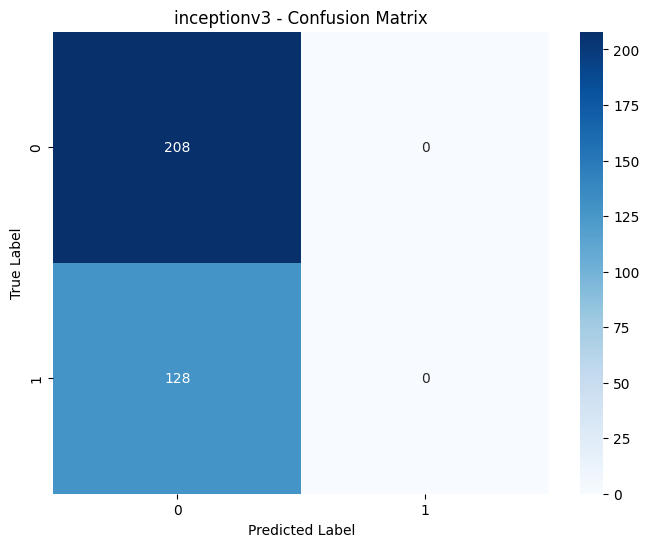

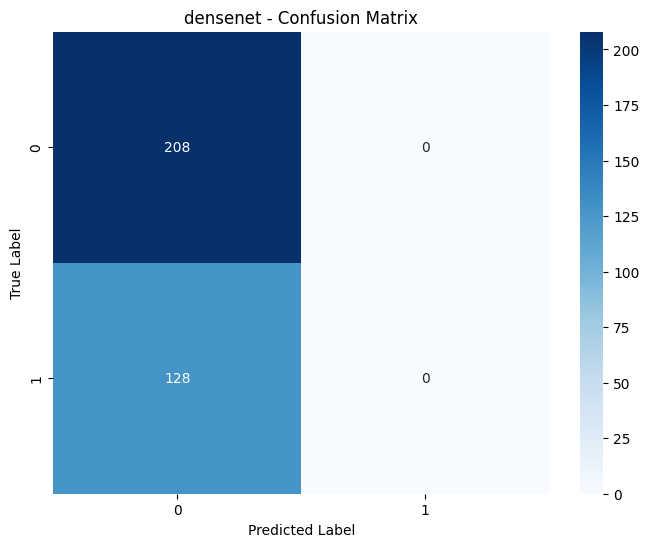

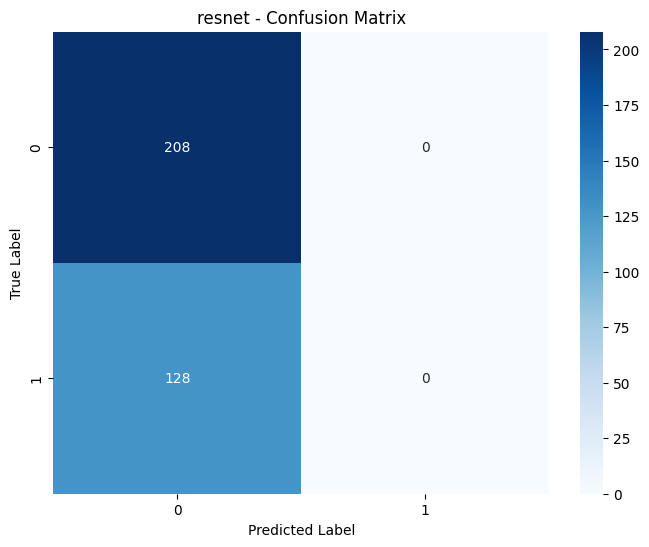

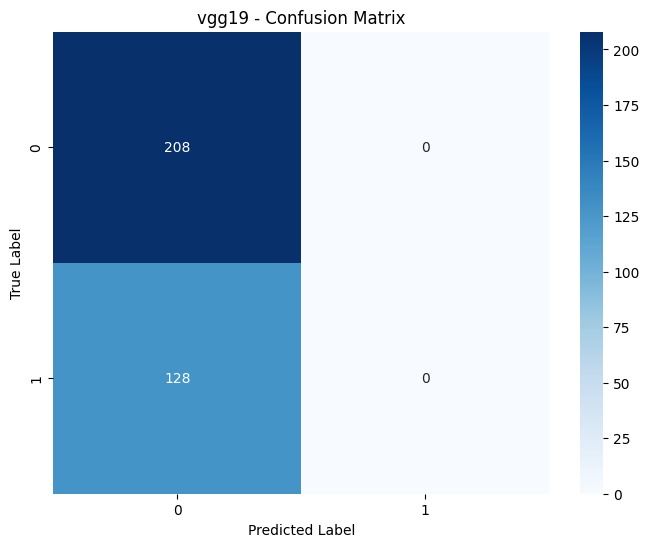

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Assuming `y_true` and `y_pred` are defined earlier 

for model_name, model in models.items():
    # Your training code here

    # Generate and plot the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sorted(os.listdir(train_dir)), 
                yticklabels=sorted(os.listdir(train_dir)))
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

